![](https://i.imgur.com/aEwmVH9.jpeg)

**Mục Lục**
1. Import thư viện
2. Load Dataset
3. Preprocessing
4. Exploratory Data Analysis (EDA)
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion



# **1. Import thư viện**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# **2. Load Dataset**


In [6]:
data = pd.read_csv('Supmarket_X.csv')
display(data.head())
print('\n\033[1mThông tin:\033[0m Dữ liệu có {} cột & {} hàng.'.format(data.shape[1], data.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Thông tin: Dữ liệu có 8 cột & 6435 hàng.


# **3. Preprocessing**

## **3.1. Kiểm tra kiểu dữ liệu của các cột**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## **3.2. Chuyển Date thành datetime**

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 484.0 KB


## **3.3. Kiểm tra giá trị Null**

In [7]:
count_null = data.isnull().sum()
print(count_null)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64


#### **Kết luận:** Dữ liệu không có giá trị Null

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(6435, 11)

## **3.4. Thông tin cơ bản**






In [9]:
#Kiểm tra số lượng giá trị duy nhất của mỗi cột

print(data.nunique().sort_values())

Holiday_Flag       2
Year               3
Month             12
Store             45
Week              52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64


In [10]:
#Thống kê cơ bản

data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201


# **4. Exploratory Data Analysis (EDA)**

## **4.1. Biểu đồ thể hiện sự phân phối của biến mục tiêu**

In [11]:
#target & features

target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]

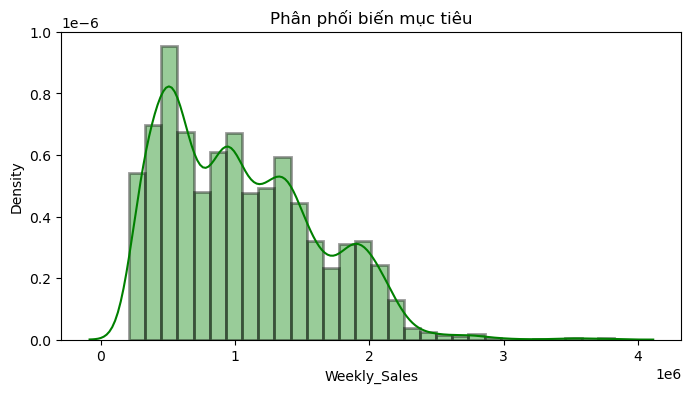

In [12]:
#Biểu đồ thể hiện sự phân phối của biến mục tiêu

plt.figure(figsize=[8,4])
sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Phân phối biến mục tiêu')
plt.show()

**Nhận xét:**
- Phân phối có xu hướng lệch phải, nghĩa là có một số tuần có doanh số rất cao so với bình thường.
- Có sự xuất hiện của các giá trị ngoại lai thể hiện những tuần có doanh thu cao, có thể liên quan đến các dịp lễ, sự kiện khuyến mãi hoặc yếu tố khác.
- Biến động doanh số: Phân phối cho thấy mức độ biến động doanh số giữa các tuần, có thể bị ảnh hưởng bởi quy mô cửa hàng, vị trí địa lý, hoặc các yếu tố kinh tế.

## **4.2. Biểu đồ thể hiện sự phân phối của các biến định lượng**

                                              Biểu đồ thể hiện sự phân phối của các biến định lượng                                               


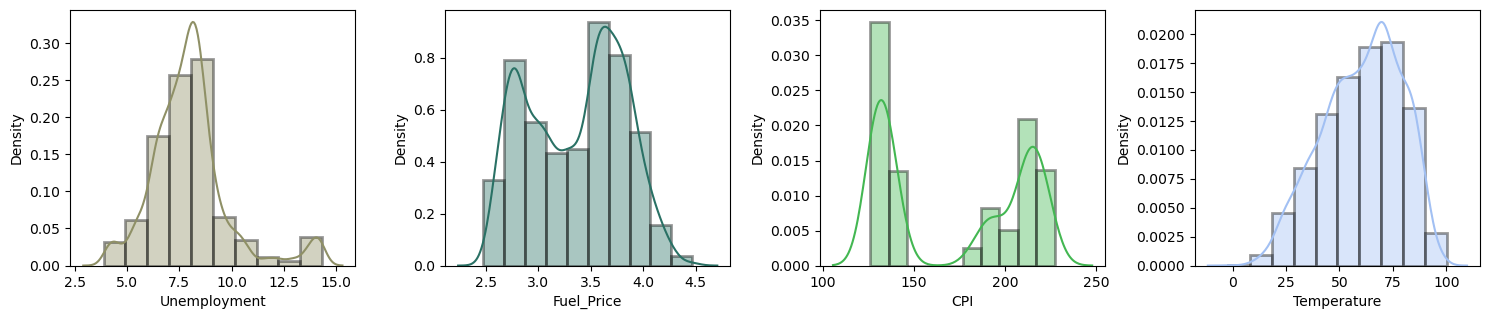

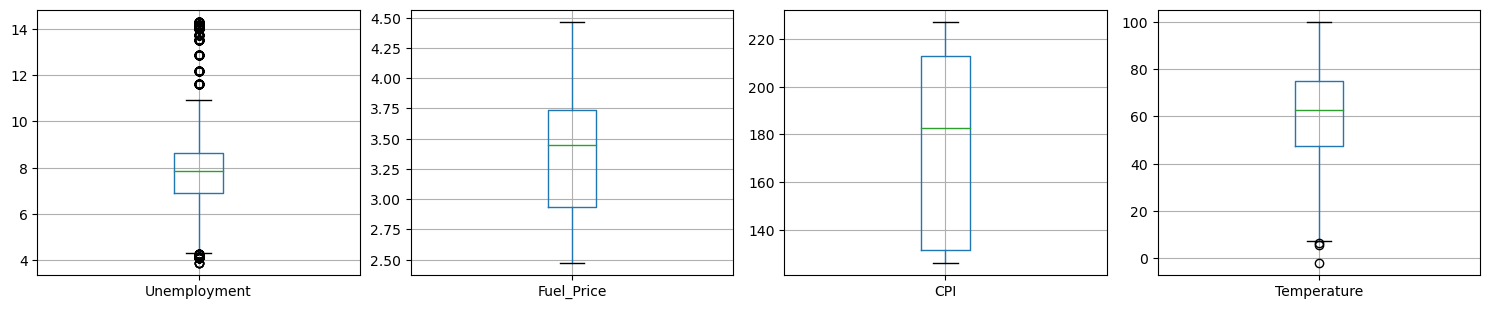

In [13]:
#Biểu đồ thể hiện sự phân phối của các biến định lượng

print('\033[1mBiểu đồ thể hiện sự phân phối của các biến định lượng'.center(150))

num_feat = ['Unemployment', 'Fuel_Price', 'CPI', 'Temperature']
n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(num_feat)/n)])
for i in range(len(num_feat)):
    plt.subplot(math.ceil(len(num_feat)/3),n,i+1)
    sns.distplot(data[num_feat[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(num_feat)/n)])
for i in range(len(num_feat)):
    plt.subplot(math.ceil(len(num_feat)/3),n,i+1)
    data.boxplot(num_feat[i])
plt.tight_layout()
plt.show()

# **Phân tích biểu đồ:**
## ***Biến Unemployment:***
+ Phân phối: Phân phối lệch phải, với phần lớn giá trị tập trung từ 6 đến 9%.
+ Ngoại lai: Có một số giá trị ngoại lai lớn hơn 12% xuất hiện, chỉ ra những tuần có tỷ lệ thất nghiệp đặc biệt cao.
+ Nhận xét: Tỷ lệ thất nghiệp có thể ảnh hưởng đến sức mua và doanh số bán hàng. Các giá trị ngoại lai này có thể đại diện cho thời kỳ khủng hoảng hoặc biến động kinh tế.
## ***Biến Fuel_Price:***
+ Phân phối: Phân phối gần như đối xứng, với giá nhiên liệu dao động từ 2.5 đến 4.5.
+ Ngoại lai: Không có giá trị ngoại lai rõ ràng, cho thấy giá nhiên liệu ổn định trong khoảng quan sát.
+ Nhận xét: Giá nhiên liệu không biến động quá lớn, nhưng sự dao động có thể ảnh hưởng đến chi phí vận chuyển và sức mua.
## ***Biến CPI:***
+ Phân phối: Phân phối khá phức tạp với nhiều đỉnh, cho thấy sự thay đổi trong các giai đoạn khác nhau.
+ Ngoại lai: Không có ngoại lai rõ ràng, nhưng chỉ số này biến động trong một phạm vi rộng (từ khoảng 180 đến 220).
+ Nhận xét: CPI phản ánh mức độ lạm phát, có thể tác động trực tiếp đến sức mua của người tiêu dùng.
## ***Biến Temperature:***
+ Phân phối: Gần như là phân phối chuẩn, với phần lớn giá trị tập trung quanh mức 50°F đến 80°F.
+ Ngoại lai: Có một số giá trị ngoại lai thấp hơn 20°F hoặc cao hơn 90°F.
+ Nhận xét: Nhiệt độ có thể ảnh hưởng đến hành vi mua sắm, đặc biệt trong các thời điểm thời tiết khắc nghiệt (ví dụ, mùa đông lạnh giá hoặc mùa hè nóng bức).
# **Nhận xét tổng quan:**
- Các giá trị ngoại lai: Biến Unemployment và Temperature có ngoại lai rõ ràng. Cần cân nhắc cách xử lý các giá trị này (loại bỏ, giữ nguyên hoặc điều chỉnh) dựa trên ảnh hưởng của chúng đến mô hình dự đoán.
- Tương quan tiềm năng: Các biến này (đặc biệt là Unemployment và CPI) có thể có tác động đến Weekly_Sales. Cần phân tích sâu hơn mối tương quan để hiểu rõ hơn về tác động.
- Sự ổn định và biến động: Fuel_Price và Temperature có sự ổn định tương đối, trong khi CPI và Unemployment có thể phản ánh biến động kinh tế trong từng giai đoạn.

## **4.3. Mối quan hệ của các features với biến mục tiêu**

### **4.3.1. Mối quan hệ giữa Holiday_Flag và Weekly_Sales**

### **Biểu đồ hộp (Boxplot) thể hiện Weekly_Sales trong các tuần Holiday và Non-Holiday**

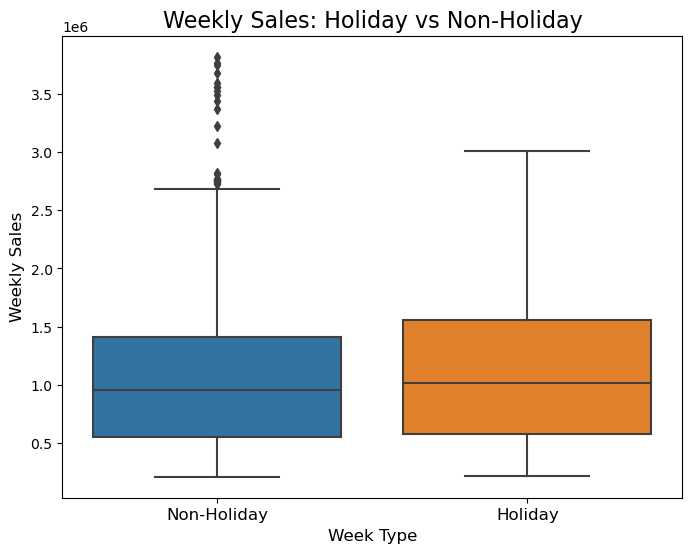

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales: Holiday vs Non-Holiday', fontsize=16)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], fontsize=12)
plt.xlabel('Week Type', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

### **Nhận Xét:**
#### 1. So sánh tổng quan giữa Holiday và Non-Holiday:
- Biểu đồ hộp cho thấy Weekly Sales trong các tuần Holiday (nghỉ lễ) có xu hướng cao hơn so với các tuần Non-Holiday (không nghỉ lễ).
- Giá trị trung vị (đường nằm ngang trong hộp) của các tuần nghỉ lễ cao hơn một chút so với các tuần bình thường, cho thấy doanh số trong kỳ nghỉ lễ có thể được đẩy mạnh.
#### 2. Độ phân tán và ngoại lệ:
 Non-Holiday:
+ Doanh số bán hàng trong các tuần không nghỉ lễ có sự tập trung rõ rệt trong khoảng từ 0.5 triệu đến 1.5 triệu.
+ Có nhiều ngoại lệ (outliers) ở phía trên, thể hiện một số tuần đặc biệt có doanh số rất cao, vượt xa mức trung bình.
  
Holiday:
+ Phạm vi doanh số trong kỳ nghỉ lễ rộng hơn, trải dài từ 0.3 triệu đến gần 3 triệu.
+ Không có nhiều outliers như Non-Holiday, nhưng giá trị lớn nhất trong kỳ nghỉ lễ (khoảng 3 triệu) cao hơn rõ rệt.
#### 3. Phân bổ dữ liệu:
- Hộp của Holiday rộng hơn, cho thấy độ phân tán doanh số trong các tuần lễ cao hơn. Điều này phản ánh sự khác biệt lớn giữa các kỳ nghỉ, có thể do mức độ mua sắm thay đổi phụ thuộc vào từng loại sự kiện như Giáng Sinh hay Super Bowl.
- Ở Non-Holiday, doanh số có sự ổn định hơn nhưng vẫn có những tuần đặc biệt vượt trội.

### **4.3.2. Biểu đồ phân phối doanh số trong các tuần nghỉ lễ và không nghỉ lễ**

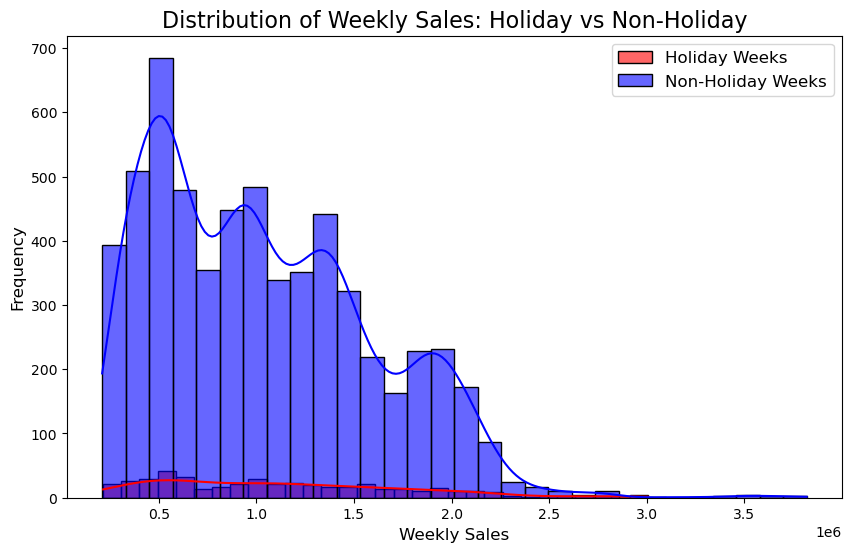

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Holiday_Flag'] == 1]['Weekly_Sales'], bins=30, color='red', kde=True, label='Holiday Weeks', alpha=0.6)
sns.histplot(data[data['Holiday_Flag'] == 0]['Weekly_Sales'], bins=30, color='blue', kde=True, label='Non-Holiday Weeks', alpha=0.6)
plt.title('Distribution of Weekly Sales: Holiday vs Non-Holiday', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.show()

### **Nhận xét:**
#### 1. Phân bố doanh số trong các tuần lễ nghỉ (Holiday Weeks):
- Các thanh màu đỏ đại diện cho doanh số trong các tuần nghỉ lễ có tần suất thấp hơn rõ rệt so với tuần thường.
- Tuy nhiên, ta có thể nhận thấy rằng doanh số trong các tuần nghỉ lễ có xu hướng cao hơn (một số thanh màu đỏ xuất hiện ở các mức doanh số cao hơn, ví dụ gần 1.5 triệu đến 3 triệu).
#### 2. Phân bố doanh số trong các tuần không nghỉ (Non-Holiday Weeks):
- Các thanh màu xanh cho thấy tần suất cao hơn nhiều, đặc biệt tập trung ở mức doanh số từ 500,000 đến 1.5 triệu.
- Phân bố lệch phải (right-skewed), có nghĩa là phần lớn doanh số tập trung ở mức thấp, và chỉ một số ít tuần có doanh số rất cao.
#### 3. So sánh giữa tuần nghỉ lễ và không nghỉ lễ:
- Mặc dù tần suất của các tuần lễ nghỉ ít hơn đáng kể, nhưng biểu đồ cho thấy doanh số trong các tuần này có xu hướng cao hơn so với tuần thường.
- Điều này có thể là do nhu cầu mua sắm tăng đột biến trong các dịp lễ như Giáng sinh, Lễ Tạ ơn hoặc Super Bowl.
#### 4. Xu hướng tổng thể:
Cả hai nhóm tuần đều cho thấy doanh số có một phạm vi rộng, từ 0.5 triệu đến hơn 3 triệu, nhưng doanh số cao hơn xuất hiện rõ ràng hơn trong các tuần lễ nghỉ.

### **4.3.3. Phân tích kỹ hơn các ngày lễ cụ thể**

### **Tạo danh sách ngày cụ thể cho các kỳ nghỉ lễ**

In [17]:
holidays = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']
}

### **Chuyển cột Date sang định dạng ngày tháng**

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

### **Gắn nhãn kỳ nghỉ cho từng hàng dữ liệu**

In [19]:
def label_holiday(date):
    for holiday, dates in holidays.items():
        if str(date.date()) in dates:
            return holiday
    return 'Non-Holiday'

data['Holiday_Name'] = data['Date'].apply(label_holiday)

print(data['Holiday_Name'].value_counts())

Holiday_Name
Non-Holiday     5985
Super Bowl       135
Labour Day       135
Thanksgiving      90
Christmas         90
Name: count, dtype: int64


### **Tính tổng doanh số theo từng kỳ nghỉ lễ**

In [20]:
holiday_sales = data[data['Holiday_Name'] != 'Non-Holiday'].groupby('Holiday_Name')['Weekly_Sales'].sum().reset_index()

### **Sắp xếp theo tổng doanh số**

In [21]:
holiday_sales = holiday_sales.sort_values(by='Weekly_Sales', ascending=False)

### **Biểu đồ doanh số các kỳ nghỉ lễ**

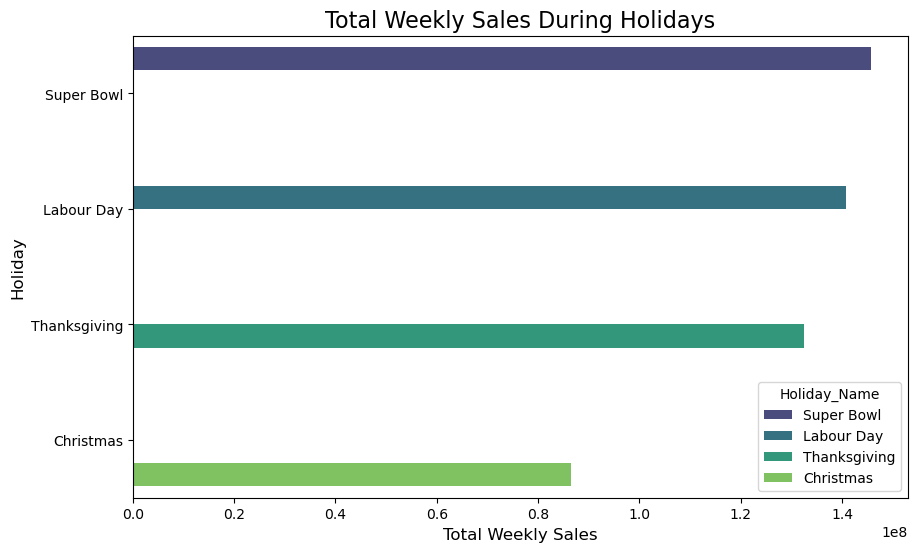

Doanh số tổng hợp của từng kỳ nghỉ lễ:
   Holiday_Name  Weekly_Sales
2    Super Bowl  1.456823e+08
1    Labour Day  1.407277e+08
3  Thanksgiving  1.324146e+08
0     Christmas  8.647498e+07


In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekly_Sales', y='Holiday_Name', data=holiday_sales, hue='Holiday_Name', palette='viridis')
plt.title('Total Weekly Sales During Holidays', fontsize=16)
plt.xlabel('Total Weekly Sales', fontsize=12)
plt.ylabel('Holiday', fontsize=12)
plt.show()

# In ra doanh số từng kỳ nghỉ lễ
print("Doanh số tổng hợp của từng kỳ nghỉ lễ:")
print(holiday_sales)

### **Nhận xét:**
#### 1. Tổng quan doanh số trong các kỳ nghỉ:
  Biểu đồ thể hiện tổng doanh số bán hàng theo từng kỳ nghỉ lớn, bao gồm: Super Bowl, Labour Day, Thanksgiving và Christmas.
- Các thanh ngang cho thấy sự so sánh trực quan giữa tổng doanh số của các kỳ nghỉ.
#### 2. Kỳ nghỉ có doanh số cao nhất:
- Super Bowl đạt tổng doanh số cao nhất, vào khoảng 1.465 tỷ.
- Điều này cho thấy kỳ nghỉ này có ảnh hưởng rất lớn đến doanh số bán hàng, có thể do nhu cầu mua sắm thực phẩm và hàng hóa phục vụ cho các hoạt động trong dịp này.
#### 3. Labour Day và Thanksgiving:
- Labour Day đứng thứ hai với tổng doanh số khoảng 1.428 tỷ, sát với Super Bowl.
- Thanksgiving xếp thứ ba với tổng doanh số 1.324 tỷ, vẫn rất cao nhưng thấp hơn một chút so với hai kỳ nghỉ đầu tiên.
Cả hai kỳ nghỉ này đều đóng góp đáng kể vào tổng doanh số, có thể do nhu cầu mua sắm và giảm giá trong các kỳ nghỉ lễ.
#### 4. Doanh số của kỳ nghỉ Giáng sinh (Christmas):
- Christmas có tổng doanh số thấp nhất, khoảng 864.7 triệu.
- Đây là kết quả bất ngờ vì Christmas thường là kỳ nghỉ quan trọng trong năm. Doanh số thấp hơn có thể do dữ liệu chỉ ghi nhận trong khoảng thời gian ngắn, hoặc người tiêu dùng mua sắm sớm hơn trước ngày lễ.
#### 5. Kết luận:
- Super Bowl và Labour Day là những kỳ nghỉ thúc đẩy doanh số bán hàng mạnh mẽ nhất.
- Thanksgiving cũng có sức ảnh hưởng lớn nhưng thấp hơn một chút.
- Christmas tuy quan trọng nhưng tổng doanh số thấp hơn, có thể do các yếu tố như thời điểm thu thập dữ liệu hoặc thói quen mua sắm.

## **Insights:**
- Holidays đóng vai trò quan trọng trong việc thúc đẩy doanh số bán hàng, với các kỳ nghỉ như Super Bowl, Labour Day và Thanksgiving có tác động mạnh mẽ nhất.
- Doanh số trong tuần lễ nghỉ không chỉ cao hơn về trung bình mà còn có phạm vi biến động rộng hơn.
- Chiến lược kinh doanh nên tập trung vào các dịp lễ lớn như Super Bowl và Labour Day để tối đa hóa doanh số, đồng thời xem xét tăng cường các chiến dịch khuyến mãi trước Christmas để khai thác tiềm năng mua sắm lớn hơn.

## **4.4. Biến CPI, Store**

### **4.4.1. Biến CPI**

In [23]:
# Thống kê cơ bản về CPI nhằm kiểm tra phạm vi giá trị biến CPI

print(data['CPI'].describe())

count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64


**Nhận xét:**

- Số lượng quan sát (count): Có 6,435 quan sát trong dữ liệu, cho thấy mẫu dữ liệu khá lớn, cung cấp cơ sở đáng tin cậy để phân tích.

- Giá trị trung bình (mean): Giá trị trung bình của CPI là 171.58, phản ánh mức giá tiêu dùng trung bình trong toàn bộ dữ liệu.

- Độ lệch chuẩn (std): Độ lệch chuẩn là 39.36, cho thấy mức độ phân tán của CPI quanh giá trị trung bình. Độ lệch chuẩn này không quá cao so với giá trị trung bình, nghĩa là dữ liệu CPI có sự phân tán vừa phải.

- Giá trị nhỏ nhất (min): Giá trị thấp nhất của CPI là 126.06, biểu thị mức giá tiêu dùng thấp nhất trong tập dữ liệu.

- Các phân vị (quartiles):

   + Phân vị thứ nhất (25%): Giá trị này là 131.74, cho thấy 25% các giá trị CPI nhỏ hơn mức này. Đây là ngưỡng của nhóm có mức giá tiêu dùng thấp hơn trung bình.
   + Phân vị thứ hai (Median - 50%): Giá trị trung vị là 182.62, cao hơn giá trị trung bình, cho thấy dữ liệu có xu hướng phân bố lệch trái nhẹ (có thể tồn tại một số giá trị nhỏ kéo trung bình xuống).
   + Phân vị thứ ba (75%): Giá trị này là 212.74, phản ánh 75% các giá trị CPI nằm dưới mức này.
- Giá trị lớn nhất (max): Giá trị cao nhất của CPI là 227.23, biểu thị mức giá tiêu dùng cao nhất trong tập dữ liệu.

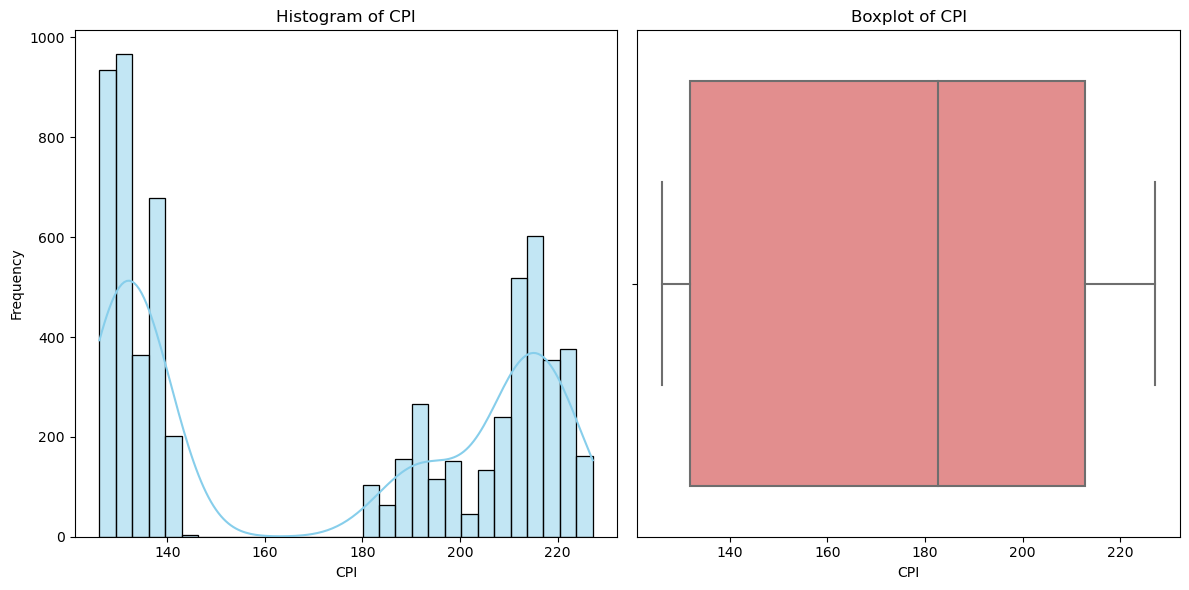

In [24]:
plt.figure(figsize=(12, 6))

# Vẽ histogram của CPI
plt.subplot(1, 2, 1)
sns.histplot(data['CPI'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')

# Vẽ boxplot của CPI
plt.subplot(1, 2, 2)
sns.boxplot(x=data['CPI'], color='lightcoral')
plt.title('Boxplot of CPI')
plt.xlabel('CPI')

plt.tight_layout()
plt.show()

**Nhận xét:**


**a. Histogram của CPI**
- Histogram của CPI cho thấy một phân phối có hai đỉnh lớn (bimodal distribution). Điều này cho thấy rằng dữ liệu CPI có thể đại diện cho hai nhóm khác nhau trong dữ liệu. Đó có thể là các điều kiện thị trường hoặc trạng thái khác nhau trong tập dữ liệu (ví dụ liên quan đến các cửa hàng (stores) ở các khu vực khác nhau, nơi mức CPI chênh lệch):
     + Một đỉnh lớn nằm trong khoảng 130–140.
     + Đỉnh lớn khác nằm ở khoảng 210–220.
- Dữ liệu CPI không có phân phối chuẩn mà thay vào đó là phân phối hai đỉnh. Điều này cần xem xét khi áp dụng các mô hình thống kê hoặc tính toán giá trị trung bình.

**b. Boxplot của CPI**

- Outliers (Giá trị ngoại lệ): Boxplot không hiển thị bất kỳ giá trị nào nằm ngoài "whiskers", điều này cho thấy rằng dữ liệu CPI không có giá trị bất thường theo quy tắc IQR (1.5 * IQR).
- Khoảng giá trị: Boxplot cho thấy CPI dao động trong khoảng từ khoảng 130 đến 220.
Phân phối: Khoảng giữa (hộp) khá rộng, cho thấy sự phân tán lớn giữa các giá trị trung vị (median) và tứ phân vị.


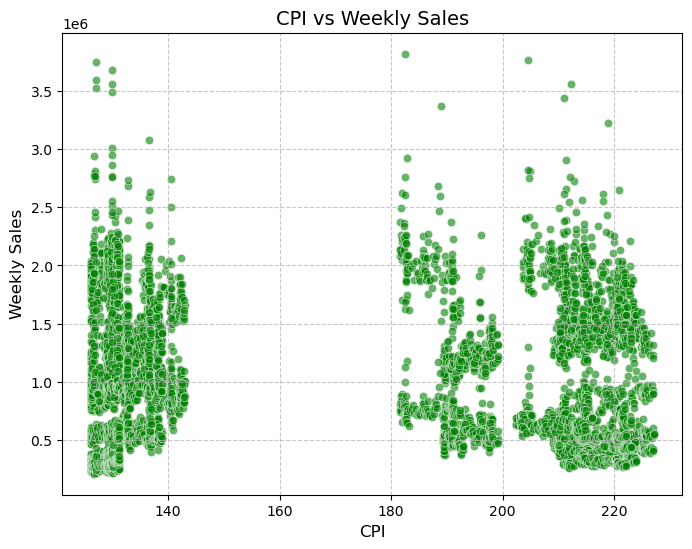

Correlation between CPI and Weekly_Sales:
                   CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


In [25]:
# Mối quan hệ giữa CPI và Weekly_Sales

correlation = data[['CPI', 'Weekly_Sales']].corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, alpha=0.6, color='green')
plt.title('CPI vs Weekly Sales', fontsize=14)
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

print("Correlation between CPI and Weekly_Sales:")
print(correlation)

**Biểu đồ phân tán:** Các điểm dữ liệu phân bố khá rải rác, không thể hiện rõ ràng một xu hướng tuyến tính giữa hai biến.

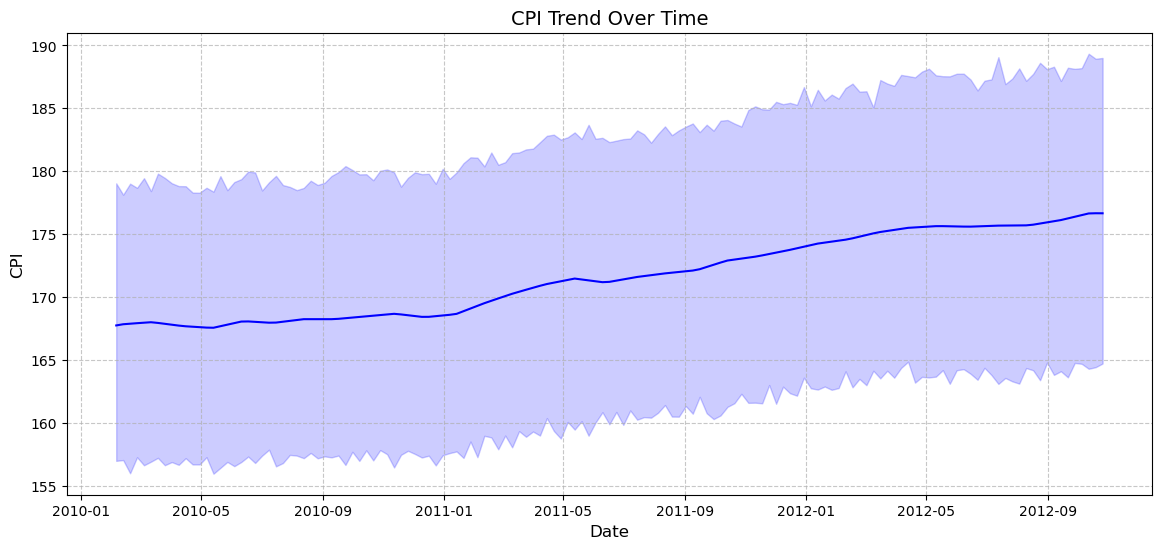

In [26]:
# Xu hướng CPI theo thời gian

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='CPI', data=data, color='blue')
plt.title('CPI Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Nhận xét:** CPI có xu hướng tăng dần theo thời gian:
Điều này phản ánh lạm phát đang tăng, giá cả hàng hóa và dịch vụ có xu hướng đắt hơn,
điều này có thể ảnh hưởng đến chi tiêu của người tiêu dùng và doanh số bán hàng.

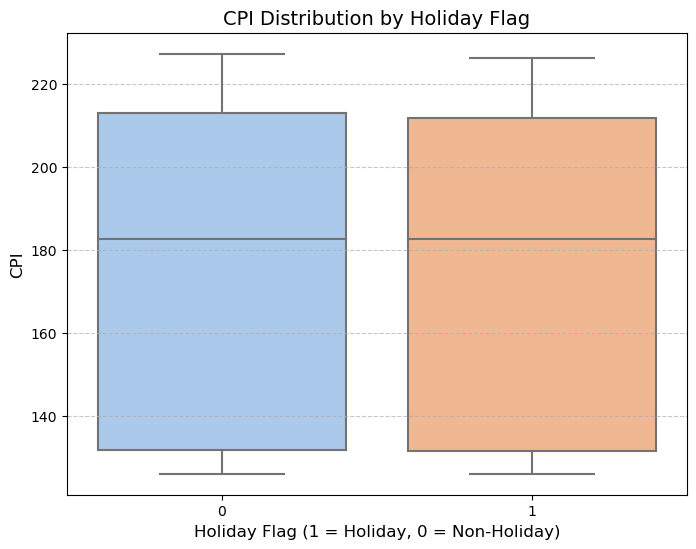

In [27]:
# Phân phối CPI theo kỳ nghỉ lễ

plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='CPI', data=data, palette='pastel')
plt.title('CPI Distribution by Holiday Flag', fontsize=14)
plt.xlabel('Holiday Flag (1 = Holiday, 0 = Non-Holiday)', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Nhận xét:** Đường trung vị trong cả hai nhóm (ngày nghỉ lễ và ngày không nghỉ lễ) gần như ngang nhau.
Điều này cho thấy chỉ số giá tiêu dùng (CPI) không có sự khác biệt đáng kể giữa hai nhóm.
Insight: Kỳ nghỉ lễ không ảnh hưởng đáng kể đến mặt bằng giá cả tổng thể trong dữ liệu.

**Kết luận từ biểu đồ:**
Dựa trên phân phối này, kỳ nghỉ lễ (Holiday_Flag = 1) không tạo ra sự khác biệt đáng kể về CPI so với ngày không nghỉ (Holiday_Flag = 0).
Do đó, yếu tố kỳ nghỉ lễ có thể không phải là biến quan trọng trong việc giải thích hoặc dự đoán CPI.

### **4.4.2. Biến Store**

In [28]:
# Đếm số lượng cửa hàng unique

unique_stores = data['Store'].nunique()
print(unique_stores)

45


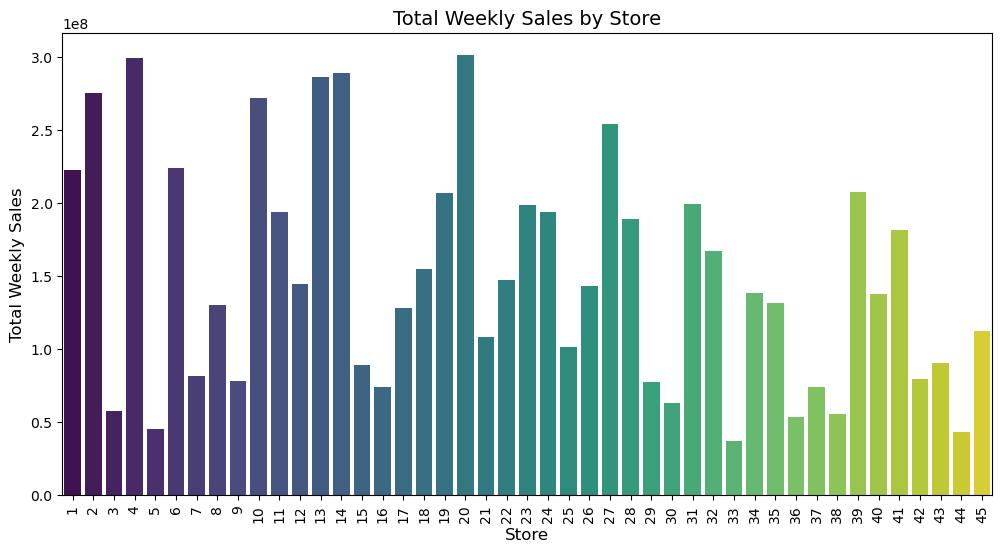

In [29]:
# Tính tổng doanh thu hàng tuần theo cửa hàng

store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.title('Total Weekly Sales by Store', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.xticks(rotation=90)
plt.show()


**Nhận xét:**
- Có sự chênh lệch đáng kể giữa các cửa hàng.
- Một số cửa hàng (như Store 20, 4, 14) đóng góp doanh thu vượt trội, trong khi nhiều cửa hàng còn lại có doanh thu thấp hơn mức trung bình.
- Các cửa hàng có doanh thu cao nhất (Store 20, 4, 14, 13, 2) có thể là các cửa hàng chủ lực, nằm tại các khu vực có lượng khách hàng lớn hoặc chiến lược kinh doanh hiệu quả.
- Độ lệch chuẩn cao cho thấy sự không đồng đều trong doanh thu giữa các cửa hàng, có thể xuất phát từ quy mô, vị trí địa lý, hoặc hiệu quả hoạt động.

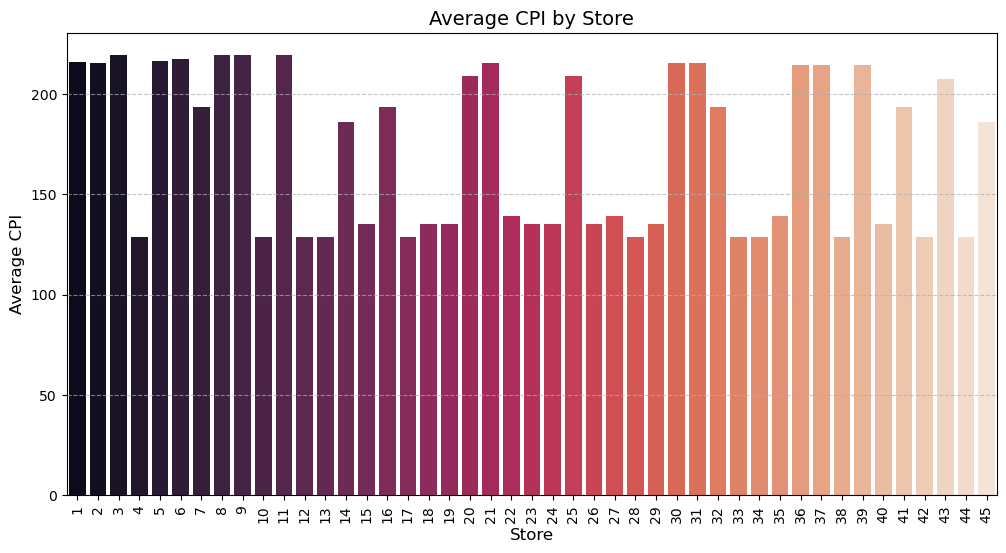

In [18]:
# Mối quan hệ CPI và Store: Tính CPI theo cửa hàng

cpi_by_store = data.groupby('Store')['CPI'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=cpi_by_store.index, y=cpi_by_store.values, palette='rocket')
plt.title('Average CPI by Store', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Average CPI', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Sự khác biệt về CPI giữa các cửa hàng:**

- Có sự chênh lệch đáng kể về giá trị trung bình của CPI giữa các cửa hàng. Một số cửa hàng có CPI rất cao (trên 200), trong khi nhiều cửa hàng khác lại có CPI thấp hơn (dưới 150).
Ví dụ:
Cửa hàng 3, 4, 10, 12, 16: CPI thấp rõ rệt so với mặt bằng chung.
Cửa hàng 1, 2, 6, 20, 30, 39: CPI cao nổi bật, có thể vượt mức 200.

- Phân phối không đồng đều:
  + Không có sự đồng đều về CPI giữa các cửa hàng. Điều này có thể do nhiều yếu tố như vị trí địa lý, chính sách giá cả, hoặc đặc điểm kinh tế của từng khu vực.

  + *Cửa hàng có CPI cao:* Các cửa hàng có CPI trung bình cao thường có thể nằm ở những khu vực có chi phí sinh hoạt cao hoặc cầu tiêu dùng lớn, dẫn đến mức giá tăng.
Những cửa hàng này có thể cần được quan tâm trong mô hình vì CPI cao có thể ảnh hưởng đến sức mua của khách hàng.
  + *Cửa hàng có CPI thấp:* Các cửa hàng với CPI trung bình thấp có thể đang hoạt động ở các khu vực có giá cả thấp hơn hoặc có chính sách giá linh hoạt hơn.

- **Ý nghĩa đối với mô hình:** CPI là một biến quan trọng phản ánh giá cả chung tại từng cửa hàng, có thể ảnh hưởng trực tiếp đến doanh số bán hàng.
Cần phân tích mối tương quan giữa CPI và doanh số để xác định xem CPI có tác động tiêu cực hay tích cực đến doanh số của từng cửa hàng.

## **4.5. Biến Fuel_Price, Unemployment**

### **4.5.1. Biến Fuel_Price**



In [31]:
#Hệ số tương quan giữa Fuel_Price và Weekly_Sales:

correlation_fp_ws = data[['Fuel_Price', 'Weekly_Sales']].corr()
print("Hệ số tương quan giữa Fuel_Price và Weekly_Sales:")
print(correlation_fp_ws)

Hệ số tương quan giữa Fuel_Price và Weekly_Sales:
              Fuel_Price  Weekly_Sales
Fuel_Price      1.000000      0.009464
Weekly_Sales    0.009464      1.000000


**Nhận xét:**
1. Độ mạnh của mối quan hệ: Hệ số tương quan rất nhỏ 0.009464 cho thấy hầu như không có mối quan hệ tuyến tính giữa giá nhiên liệu (Fuel_Price) và doanh thu hàng tuần (Weekly_Sales). Điều này nghĩa là sự biến động của giá nhiên liệu không ảnh hưởng đáng kể đến doanh thu.
2. Giải thích kinh tế: Trong bối cảnh siêu thị, giá nhiên liệu có thể không phải là yếu tố chính ảnh hưởng đến doanh thu. Khách hàng có thể vẫn duy trì thói quen mua sắm bất chấp sự thay đổi về giá nhiên liệu. Tuy nhiên, giá nhiên liệu có thể tác động gián tiếp đến hành vi tiêu dùng thông qua các chi phí vận chuyển hoặc chi tiêu hộ gia đình, nhưng điều này không được phản ánh rõ trong dữ liệu.
3. Ý nghĩa thực tiễn: Do mối tương quan rất yếu, biến Fuel_Price có thể không đóng vai trò quan trọng trong việc dự đoán doanh thu hàng tuần. Tuy nhiên, biến này vẫn có thể giữ lại để phân tích thêm trong mô hình vì ảnh hưởng gián tiếp của nó có thể xuất hiện khi kết hợp với các biến khác.

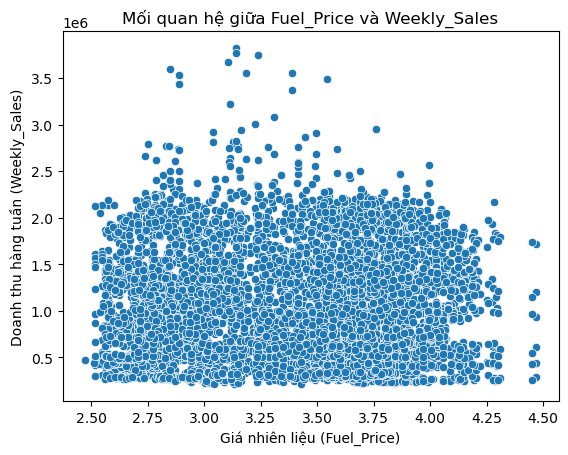

In [32]:
#Biểu đồ scatter plot để kiểm tra trực quan xu hướng giữa hai biến.

sns.scatterplot(x=data['Fuel_Price'], y=data['Weekly_Sales'])
plt.title('Mối quan hệ giữa Fuel_Price và Weekly_Sales')
plt.xlabel('Giá nhiên liệu (Fuel_Price)')
plt.ylabel('Doanh thu hàng tuần (Weekly_Sales)')
plt.show()

**Nhận xét:**
- Phân tán dữ liệu: Dữ liệu phân bố dày đặc, đặc biệt tập trung ở khoảng giá nhiên liệu từ 2.75 đến 4.00 (Fuel_Price) và doanh thu trong khoảng từ 1 triệu đến 2.5 triệu (Weekly_Sales).
- Không có dấu hiệu rõ ràng của mối quan hệ tuyến tính giữa giá nhiên liệu và doanh thu. Doanh thu không tăng hoặc giảm rõ rệt khi giá nhiên liệu thay đổi, cho thấy giá nhiên liệu không phải yếu tố ảnh hưởng mạnh mẽ trực tiếp đến doanh thu.
- Ý nghĩa kinh tế: Giá nhiên liệu có thể ảnh hưởng gián tiếp đến doanh thu, thông qua các yếu tố kinh tế khác.

### **4.5.2. Biến Unemployment**

In [33]:
# Hệ số tương quan: Unemployment và Weekly_Sales

correlation_ue = data[['Unemployment', 'Weekly_Sales']].corr()
print("Hệ số tương quan giữa Unemployment và Weekly_Sales:")
print(correlation_ue)

Hệ số tương quan giữa Unemployment và Weekly_Sales:
              Unemployment  Weekly_Sales
Unemployment      1.000000     -0.106176
Weekly_Sales     -0.106176      1.000000


**Nhận xét:**
- Độ mạnh của mối quan hệ: Giá trị -0.106176 là một hệ số tương quan rất nhỏ, cho thấy mối quan hệ giữa Unemployment (tỷ lệ thất nghiệp) và Weekly_Sales (doanh thu hàng tuần) rất yếu. Mức độ ảnh hưởng của Unemployment lên Weekly_Sales là không đáng kể.
- Hướng của mối quan hệ: Giá trị âm cho thấy mối quan hệ ngược chiều: khi tỷ lệ thất nghiệp (Unemployment) tăng, doanh thu hàng tuần (Weekly_Sales) có xu hướng giảm, nhưng tác động này rất nhỏ.
- Ý nghĩa thực tiễn: Có thể dự đoán rằng tỷ lệ thất nghiệp cao sẽ làm giảm sức mua và doanh thu, nhưng trong dữ liệu này, tác động này không rõ ràng.

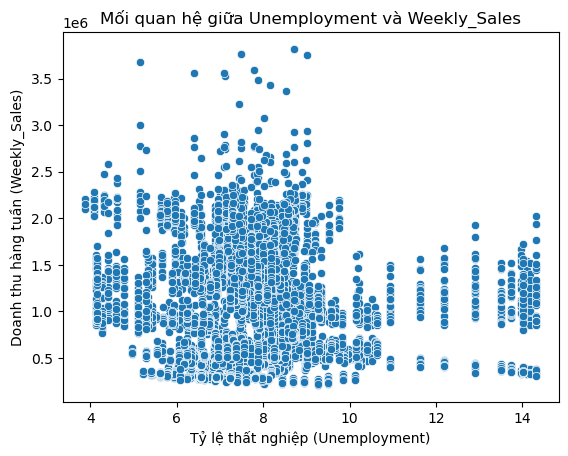

In [20]:
#Quan hệ giữa tỷ lệ thất nghiệp (Unemployment) và doanh thu:
# Scatter plot

sns.scatterplot(x=data['Unemployment'], y=data['Weekly_Sales'])
plt.title('Mối quan hệ giữa Unemployment và Weekly_Sales')
plt.xlabel('Tỷ lệ thất nghiệp (Unemployment)')
plt.ylabel('Doanh thu hàng tuần (Weekly_Sales)')
plt.show()

**Nhận xét:**
- Phân tán dữ liệu: Biểu đồ cho thấy dữ liệu khá phân tán, không có xu hướng rõ rệt về mối quan hệ tuyến tính giữa tỷ lệ thất nghiệp và doanh thu.
- Không có dấu hiệu mạnh mẽ về mối quan hệ tỷ lệ thuận hay tỷ lệ nghịch giữa tỷ lệ thất nghiệp và doanh thu. Điều này gợi ý rằng tỷ lệ thất nghiệp có thể không phải là yếu tố chính ảnh hưởng đến doanh thu hàng tuần.
- Ý nghĩa kinh tế: Tỷ lệ thất nghiệp có thể ảnh hưởng gián tiếp đến doanh thu, thông qua các yếu tố kinh tế khác như CPI hoặc Fuel_Price.

## **4.6. Biến Temperature**

In [35]:
# Hệ số tương quan: Temperature và Weekly_Sales

correlation_tp = data[['Temperature', 'Weekly_Sales']].corr()
print("Hệ số tương quan giữa Temperature và Weekly_Sales:")
print(correlation_tp)

Hệ số tương quan giữa Temperature và Weekly_Sales:
              Temperature  Weekly_Sales
Temperature       1.00000      -0.06381
Weekly_Sales     -0.06381       1.00000


**Nhận xét:** Kết quả phân tích hệ số tương quan giữa Temperature và Weekly_Sales là -0.0638, cho thấy mối quan hệ giữa nhiệt độ và doanh thu hàng tuần là rất yếu và gần như không có mối liên hệ rõ ràng. Với hệ số tương quan gần bằng 0, có thể kết luận rằng sự thay đổi trong nhiệt độ không có ảnh hưởng đáng kể đến doanh thu bán hàng hàng tuần trong dữ liệu này.

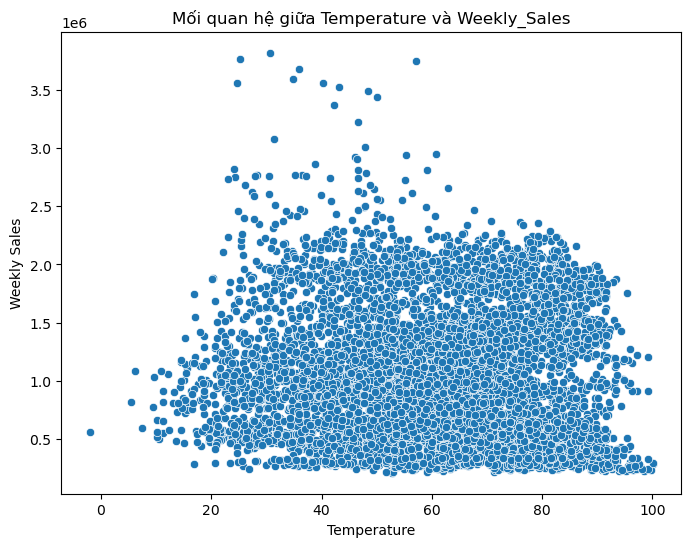

In [36]:
#  Mối quan hệ giữa Temperature và Weekly_Sales

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Mối quan hệ giữa Temperature và Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

**Nhận xét:** Biểu đồ scatter plot cho thấy sự phân tán khá rộng giữa các điểm dữ liệu, điều này càng củng cố nhận định rằng không có mối quan hệ tuyến tính rõ ràng giữa nhiệt độ và doanh thu. Các điểm dữ liệu không tập trung vào một vùng nhất định mà phân tán đều, điều này cho thấy rằng sự thay đổi trong nhiệt độ không nhất thiết phải tương quan với sự thay đổi trong doanh thu.

## **4.7. Tương quan giữa các biến định lượng và biến mục tiêu**

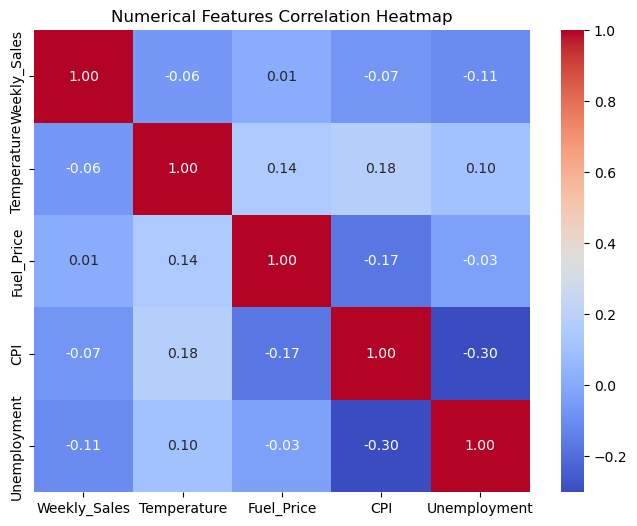

In [37]:
#Heatmap thể hiện sự tương quan giữa các biến định lượng và biến mục tiêu

correlation_nf = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_nf, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Features Correlation Heatmap')
plt.show()

**Nhận xét:**
- Các biến độc lập Temperature, Fuel_Price, CPI, và Unemployment có mối tương quan rất yếu với biến mục tiêu Weekly_Sales. Điều này cho thấy doanh thu hàng tuần không bị ảnh hưởng nhiều bởi các yếu tố này.
- Hầu hết các mối tương quan giữa các biến độc lập là yếu hoặc rất yếu, ngoại trừ mối tương quan giữa CPI và Unemployment (-0.30). Điều này phù hợp với lý thuyết kinh tế: Khi tỷ lệ thất nghiệp giảm, người tiêu dùng có thu nhập cao hơn, dẫn đến tăng chi tiêu, làm tăng CPI (chỉ số giá tiêu dùng).
- Để hiểu rõ hơn về doanh thu, cần phân tích thêm các yếu tố khác như ngày lễ hoặc vị trí cửa hàng.

# **5. Data Manipulation**

## **5.1. Mã hóa các biến định tính**

In [38]:
data.drop(['Date', 'Year', 'Month', 'Week', 'Holiday_Flag'], axis=1, inplace=True)

#Mã hóa các biến định tính

data = pd.get_dummies(data, columns=['Store'], prefix='Store')
data = pd.get_dummies(data, columns=['Holiday_Name'], prefix='Holiday')

In [41]:
# Chuyển các cột dummy của 'Store' sang dạng int
store_columns = [col for col in data.columns if col.startswith('Store_')]
data[store_columns] = data[store_columns].astype(int)

# Chuyển các cột dummy của 'Holiday_Name' sang dạng int
holiday_columns = [col for col in data.columns if col.startswith('Holiday_')]
data[holiday_columns] = data[holiday_columns].astype(int)

# Kiểm tra kiểu dữ liệu sau khi chuyển đổi
print(data.dtypes)

Weekly_Sales            float64
Temperature             float64
Fuel_Price              float64
CPI                     float64
Unemployment            float64
Store_1                   int32
Store_2                   int32
Store_3                   int32
Store_4                   int32
Store_5                   int32
Store_6                   int32
Store_7                   int32
Store_8                   int32
Store_9                   int32
Store_10                  int32
Store_11                  int32
Store_12                  int32
Store_13                  int32
Store_14                  int32
Store_15                  int32
Store_16                  int32
Store_17                  int32
Store_18                  int32
Store_19                  int32
Store_20                  int32
Store_21                  int32
Store_22                  int32
Store_23                  int32
Store_24                  int32
Store_25                  int32
Store_26                  int32
Store_27

## **5.2. Loại bỏ các giá trị ngoại lai**

In [44]:
#Loại bỏ các giá trị ngoại lai

num_feat = ['Unemployment', 'Fuel_Price', 'CPI', 'Temperature']

df1 = data.copy()

for i in num_feat:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mNhận xét:\033[0m\nTrước khi loại bỏ các giá trị ngoại lai, bộ dữ liệu có {} samples.'.format(data.shape[0]))
print('Sau khi loại bỏ các giá trị ngoại lai, bộ dữ liệu có {} samples.'.format(df1.shape[0]))

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Christmas,Holiday_Labour Day,Holiday_Non-Holiday,Holiday_Super Bowl,Holiday_Thanksgiving
0,1643690.90,42.31,2.572,211.096358,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1611968.17,39.93,2.514,211.289143,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0



Nhận xét:
Trước khi loại bỏ các giá trị ngoại lai, bộ dữ liệu có 6435 samples.
Sau khi loại bỏ các giá trị ngoại lai, bộ dữ liệu có 5953 samples.


# **6. Features selection**

## **6.1. Lựa chọn biến**

Nhóm quyết định sử dụng tất cả các biến định lượng Temperature, Fuel_Price, CPI, và Unemployment và 2 biến định tính là Store và Holiday sau khi mã hóa để huấn luyện mô hình do không muốn bỏ sót biến khiến mô hình trở nên không chính xác. Nhóm sẽ lựa chọn nhưng phương pháp tự động giảm trọng số khi huấn luyện mô hình để có được kết quả dự báo chính xác nhất.

In [49]:
X = df1.drop(['Weekly_Sales'],axis=1)
Y = df1['Weekly_Sales']

## **6.2. Chuẩn hóa**

                                              Biểu đồ thể hiện sự phân phối của các biến định lượng                                               


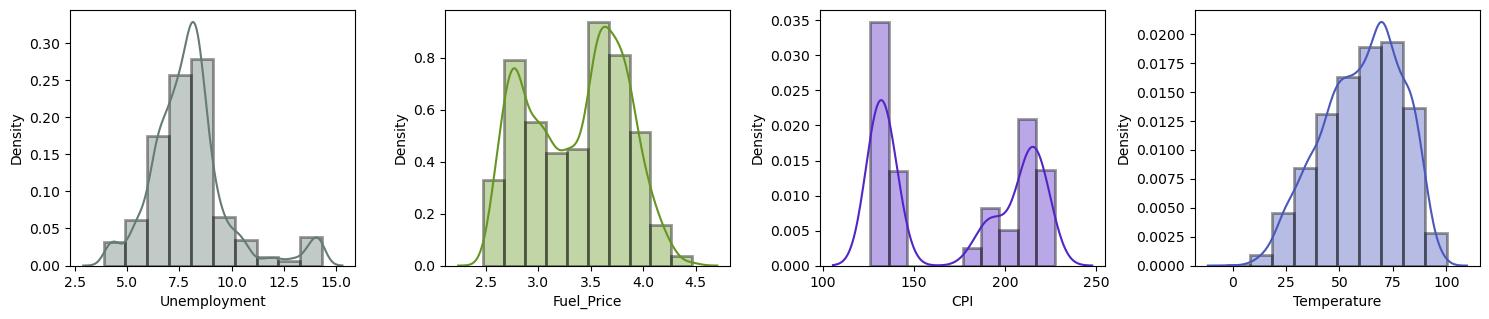

In [48]:
#Vẽ biểu đồ thể hiện sự phân phối của các biến định lượng

print('\033[1mBiểu đồ thể hiện sự phân phối của các biến định lượng'.center(150))

num_feat = ['Unemployment', 'Fuel_Price', 'CPI', 'Temperature']
n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(num_feat)/n)])
for i in range(len(num_feat)):
    plt.subplot(math.ceil(len(num_feat)/3),n,i+1)
    sns.distplot(data[num_feat[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

**Nhận xét:**
- Biến Unemployment: Phân phối lệch phải.
- Biến Fuel_Price và biến CPI: Phân phối khá phức tạp với nhiều đỉnh, cho thấy sự thay đổi trong các giai đoạn khác nhau.
- Biến Temperature: Gần như là phân phối chuẩn.

**=> Từ các nhận xét trên, nhóm quyết định chuẩn hoá bằng phương pháp StandardScaler**

In [51]:
#Chia bộ dữ liệu bằng tập t

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

#Chuẩn hóa
std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Test_X_std = std.transform(Test_X)


Original set  --->  (5953, 54) (5953,) 
Training set  --->  (4762, 54) (4762,) 
Testing set   --->  (1191, 54)  (1191,)


# **7. Model development**

*Tạo 1 dictionary có value là các chỉ số để so sánh các model*

In [53]:
model_comparison = {}

In [54]:
# Chia tập Train_X_std thành tập train và validation

X_train, X_val, y_train, y_val = train_test_split(Train_X_std, Train_Y, test_size=0.25, random_state=42)

## **7.1. Linear Regression**

In [55]:
# Tạo mô hình Linear Regression
model0 = LinearRegression()

# Fit mô hình vào tập train
model0.fit(X_train, y_train)

y_pred1 = model0.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred1)),4))

rmse default 163057.9851


- Nhóm sử dụng GridSearchCV để thực hiện Grid Search với cross-validation. Đầu tiên, nhóm định nghĩa mô hình Linear Regression (model1) và định nghĩa một grid (param_grid) với các giá trị siêu tham số cần tìm. Trong trường hợp này, chúng ta tìm các giá trị fit_intercept (True/False).
- Sau đó, nhóm tạo một đối tượng GridSearchCV với mô hình, grid và các thông số khác như số lượng fold trong cross-validation (cv) và phương thức đánh giá (scoring). Tiếp theo, nhóm gọi phương thức fit trên GridSearchCV để thực hiện tìm kiếm siêu tham số tốt nhất.
- Tiếp tục, nhóm in ra siêu tham số tốt nhất (best_params_) và điểm RMSE tốt nhất (best_score_).

In [59]:
# Định nghĩa grid search với các giá trị siêu tham số cần tìm
param_grid = {'fit_intercept': [True, False]}

# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(model0, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 148474.7371


Ở đây, chúng ta thấy "Best Parameters: {'fit_intercept': True}", siêu tham số tốt nhất cho mô hình Linear Regression là fit_intercept=True.
Sau khi tìm thấy siêu tham số tốt nhất từ Grid Search (cụ thể ở đây: fit_intercept=True), nhóm tạo mô hình Linear Regression với giá trị siêu tham số đó bằng cách truyền nó vào khi khởi tạo mô hình (LinearRegression(fit_intercept=True)).
Sau đó, nhóm sử dụng phương thức .fit() để huấn luyện lại mô hình.

In [72]:
# Tạo mô hình Linear Regression với siêu tham số tốt nhất
model1 = LinearRegression(fit_intercept=True)

# Fit mô hình vào tập huấn luyện
model1.fit(X_train, y_train)

LinearRegression()

Cuối cùng, nhóm đánh giá mô hình trên tập validation bằng cách tính toán Mean Squared Error (mean_squared_error).

In [73]:
# Đánh giá trên tập validation

y_val_pred = model1.predict(X_val)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Linear Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 163057.9851
RMSE on validation set: 0.9155257357782184


## **7.2. Polynomial Regression**

Nhóm sử dụng hàm PolynomialFeatures từ module scikit-learn để chuyển đổi đầu vào X_train thành ma trận đa thức X_poly_train. Tương tự với tập validation. Bậc của đa thức được xác định bởi biến degree. Sau đó, nhóm khởi tạo mô hình LinearRegression và sử dụng phương thức fit để phù hợp với dữ liệu X_poly và y.

In [62]:
# Khởi tạo mô hình Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train, y_train)
X_val_poly = poly_features.transform(X_val)

# Phù hợp với mô hình Polynomial Regression
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

Tương tự như model Linear Regression, nhóm sử dụng GridSearchCV để tìm ra siêu tham số, sau đó, nhóm in ra siêu tham số tốt nhất (best_params_) và điểm R^2 tốt nhất (best_score_)

In [63]:
# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

Best Parameters: {'fit_intercept': True}
Best RMSE Score: 148474.7371


Truyền siêu tham số - Best Parameters: {'fit_intercept': True} vào mô hình và huấn luyện lại.

In [68]:
# Tạo mô hình Linear Regression với siêu tham số tốt nhất
model3 = LinearRegression(fit_intercept=True)

# Fit mô hình vào tập huấn luyện
model3.fit(X_train_poly, y_train)

LinearRegression()

Cuối cùng, đánh giá mô hình trên tập validation bằng cách tính toán Mean Squared Error (mean_squared_error).

In [69]:
# Đánh giá trên tập validation
y_val_pred = model3.predict(X_val_poly)
val_rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 4)
val_r2 = r2_score(y_val,y_val_pred)
print("Root Mean Squared Error on validation set:", val_rmse)
print('RMSE on validation set:', val_r2)

model_comparison['Polynomial Regression']=[val_rmse, val_r2]

Root Mean Squared Error on validation set: 223198149560735.34
RMSE on validation set: -1.582783282106929e+17


## **7.3. Ridge**

In [77]:
# Khởi tạo mô hình Ridge
ridge_model = Ridge()
param_grid_ridge = {"alpha": [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best Ridge Parameters
print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge RMSE:", np.sqrt(-ridge_grid.best_score_))

# Evaluate Ridge on Test Set
ridge_best = Ridge(**ridge_grid.best_params_)
ridge_best.fit(X_train, y_train)
y_val_pred_ridge = ridge_best.predict(X_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
ridge_r2 = r2_score(y_val, y_val_pred_ridge)
print("Ridge Test RMSE:", ridge_rmse)
print("Ridge Test R^2:", ridge_r2)

model_comparison['Ridge']=[ridge_rmse, ridge_r2]

Best Ridge Parameters: {'alpha': 1.0}
Best Ridge RMSE: 148461.94761610677
Ridge Test RMSE: 162751.1153149862
Ridge Test R^2: 0.9158433921439739


## **7.4. Lasso**

In [78]:
# Khởi tạo mô hình Lasso
lasso_model = Lasso()
param_grid_lasso = {"alpha": [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best Lasso Parameters
print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso RMSE:", np.sqrt(-lasso_grid.best_score_))

# Evaluate Lasso on Test Set
lasso_best = Lasso(**lasso_grid.best_params_)
lasso_best.fit(X_train, y_train)
y_val_pred_lasso = lasso_best.predict(X_val)
lasso_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
lasso_r2 = r2_score(y_val, y_val_pred_lasso)
print("Lasso Test RMSE:", lasso_rmse)
print("Lasso Test R^2:", lasso_r2)

model_comparison['Ridge']=[lasso_rmse, lasso_r2]

Best Lasso Parameters: {'alpha': 10.0}
Best Lasso RMSE: 148469.45327208386
Lasso Test RMSE: 162764.74953299976
Lasso Test R^2: 0.9158292913791616


## **7.5. Random Forest**

In [85]:
# khởi tạo mô hình
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

y_pred3 = rfr.predict(X_val)
print('rmse default', round(math.sqrt(mean_squared_error(y_val, y_pred3)),4))


rmse default 153948.3349


In [ ]:
# tạo grid search để tìm hyperparameters tốt nhất
params = {'n_estimators': np.arange(50, 500, 50, dtype=np.int32),
          "max_features": ["auto", "sqrt", "log2"],
          "max_depth": [None] + list(np.arange(5, 50, 5)),
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 1),
          'ccp_alpha': [0.0, 0.1, 0.5, 1.0],
          'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],
          'max_samples': [None, 0.5, 0.8],
          'min_impurity_decrease': np.arange(0, 0.1, 0.01),
          'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'n_jobs': [-1],
          'oob_score': [True, False],
          'random_state': [42],
          'warm_start': [True, False]}
random_rfr = RandomizedSearchCV(rfr, params, n_iter = 60, cv=5, scoring = 'neg_root_mean_squared_error', verbose = 1)
random_rfr.fit(X_train, y_train)


In [82]:
# In hyperparam tốt nhất
print("Best Parameters:", random_rfr.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(random_rfr.best_score_.round(4)))


Best Parameters: {'warm_start': False, 'random_state': 42, 'oob_score': False, 'n_jobs': -1, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.09, 'max_samples': 0.8, 'max_leaf_nodes': 15, 'max_features': 'log2', 'max_depth': 40, 'ccp_alpha': 0.1}
Best RMSE Score: 313497.4731


In [87]:
# Train lại với tập train và test trên tập validation
tuned_rfr = RandomForestRegressor(warm_start = False, random_state = 42, oob_score = False, n_jobs = -1, n_estimators = 200,min_weight_fraction_leaf = 0.0, min_samples_split = 2, min_samples_leaf = 4, min_impurity_decrease = 0.09, max_samples = 0.8, max_leaf_nodes = 15, max_features = 'log2', max_depth = 40, ccp_alpha = 0.1)
tuned_rfr.fit(X_train, y_train)
tuned_y_pred = tuned_rfr.predict(X_val)

val_rmse = round(math.sqrt(mean_squared_error(y_val, tuned_y_pred)),4)
val_r2 = r2_score(y_val,tuned_y_pred)

print('rmse on validation set', val_rmse)
print('r2 on validation set', val_r2)

model_comparison['Random Forest Regressor']=[val_rmse, val_r2]

rmse on validation set 304815.891
r2 on validation set 0.7048005908700221


## **7.6. Model Comparison**

In [88]:
#Tạo Dataframe là bảng các chỉ số RMSE của tât cả các mô hình sau khi đã tune
model_com_df=pd.DataFrame(model_comparison).T
model_com_df.columns=['RMSE', 'R2']
model_com_df= model_com_df.sort_values(by='RMSE',ascending=False)
model_com_df.style.background_gradient(cmap='RdPu')

,RMSE,R2
Polynomial Regression,223198149560735.343750,-158278328210692896.000000
Random Forest Regressor,304815.891000,0.704801
Linear Regression,163057.985100,0.915526
Ridge,162764.749533,0.915829


Vậy, dựa theo kết quả trên, ta thấy Ridge có RMSE thấp nhất và R2 cao nhất.
Vì vậy, nhóm chọn mô hình Ridge.

## **7.7. Model Validation**

Cuối cùng, nhóm tiến hành chạy lại mô hình trên tập Train_X_std.

In [90]:
ridge_best.fit(Train_X_std, Train_Y)
y_predtest = ridge_best.predict(Test_X_std)

val_rmse = round(math.sqrt(mean_squared_error(Test_Y, y_predtest)),4)
val_r2 = r2_score(Test_Y, y_predtest)

print('rmse on test set', val_rmse)
print('r2 on test set', val_r2)

rmse on test set 170754.9452
r2 on test set 0.9157752558105461


# **8. Conclusion**

### Phân tích kết quả của mô hình Ridge Regression cuối cùng:
+ RMSE trên test set: 170754.95: Giá trị RMSE thấp trên tập kiểm tra cho thấy mô hình Ridge Regression có khả năng dự đoán tốt và ổn định trên dữ liệu mới, không bị overfitting hoặc underfitting.
+ 𝑅2 trên test set: 0.915752558105461: Kết quả rất cao, chứng minh rằng mô hình có thể giải thích 91.57% sự biến thiên của doanh thu hàng tuần trong tập kiểm tra.
### Lý do chọn Ridge Regression:
+ Ridge Regression giảm thiểu vấn đề đa cộng tuyến (multicollinearity) giữa các biến độc lập bằng cách thêm một thuật ngữ phạt (penalty term). Đây là lợi thế lớn đối với bộ dữ liệu này khi vẫn có tồn tại đa cộng tuyến giữa các biến.

### Kết luận:
+ Mô hình Ridge Regression là sự lựa chọn hợp lý cho bài toán dự đoán doanh thu hàng tuần, với khả năng dự đoán mạnh mẽ, ổn định, và tránh overfitting. Kết quả đạt được giúp nhóm có thể tự tin áp dụng mô hình này cho các dữ liệu mới trong tương lai.